## 수강생 이름을 입력해주세요
> 이름:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pymysql
import pymysql.cursors
import time
import os

# 1. 벅스 차트 크롤링
- 실시간, 100개
- url : https://music.bugs.co.kr/chart
- 곡명, 아티스트명
- 결과는 아래 예시와 같이 DataFrame 에 담고 보여주기 → 변수명 **bugs_df**
- 하나의 셀로 작성하세요

[예시]
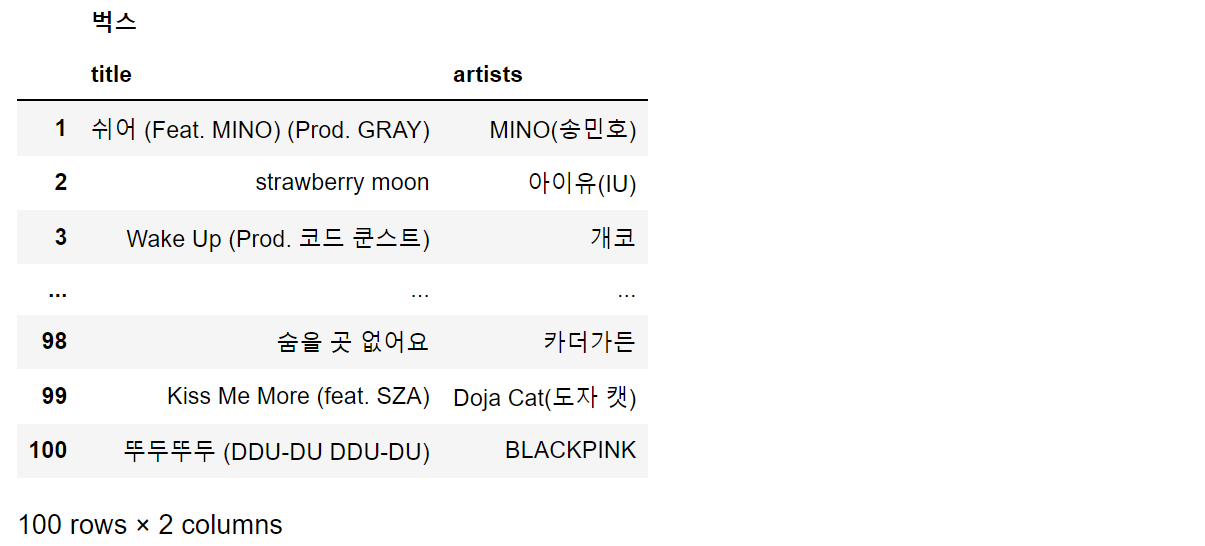

In [462]:
# TODO
bugs_url='https://music.bugs.co.kr/chart' #url 저장
response = requests.get(bugs_url)         #response 저장
df = pd.read_html(response.text)          #df에 크롤링 저장
bugs_rank = df[0][['곡','아티스트']]      #원하는 데이터 경로 인덱싱
bugs_rank.name = '벅스'                   #이름 지정
bugs_rank.index += 1                      #인덱싱 값에 1을더해 순위와 동일시
bugs_rank.rename(columns={'곡':'title','아티스트':'artists'},inplace=True) #컬럼 이름 재지정
bugs_df = bugs_rank                       #이름 재정의(shallow copy)
bugs_df.columns.name = '벅스'             #컬럼이름 정의
bugs_df.index.name = '순위'               #인덱스에 이름'순위'부여
bugs_df # ← 보여주기

C:\Users\user\AppData\Local\Temp\ipykernel_19352\597044710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bugs_rank.rename(columns={'곡':'title','아티스트':'artists'},inplace=True)


벅스,title,artists
순위,,
1,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
2,LOVE DIVE,IVE (아이브)
3,감동이야 (feat. 성시경),싸이 (PSY)
4,TOMBOY,(여자)아이들
5,Celeb,싸이 (PSY)
...,...,...
96,나는 트로트가 싫어요,임창정
97,서랍,10CM
98,바라만 본다,MSG워너비(M.O.M)


# 2. 멜론 차트 크롤링
- 실시간, 100개
- url : https://www.melon.com/chart/index.htm
- 곡명, 아티스트명
- 결과는 아래 예시와 같이 DataFrame 에 담고 보여주기 → 변수명 **melon_df**
- 하나의 셀로 작성하세요

[예시]
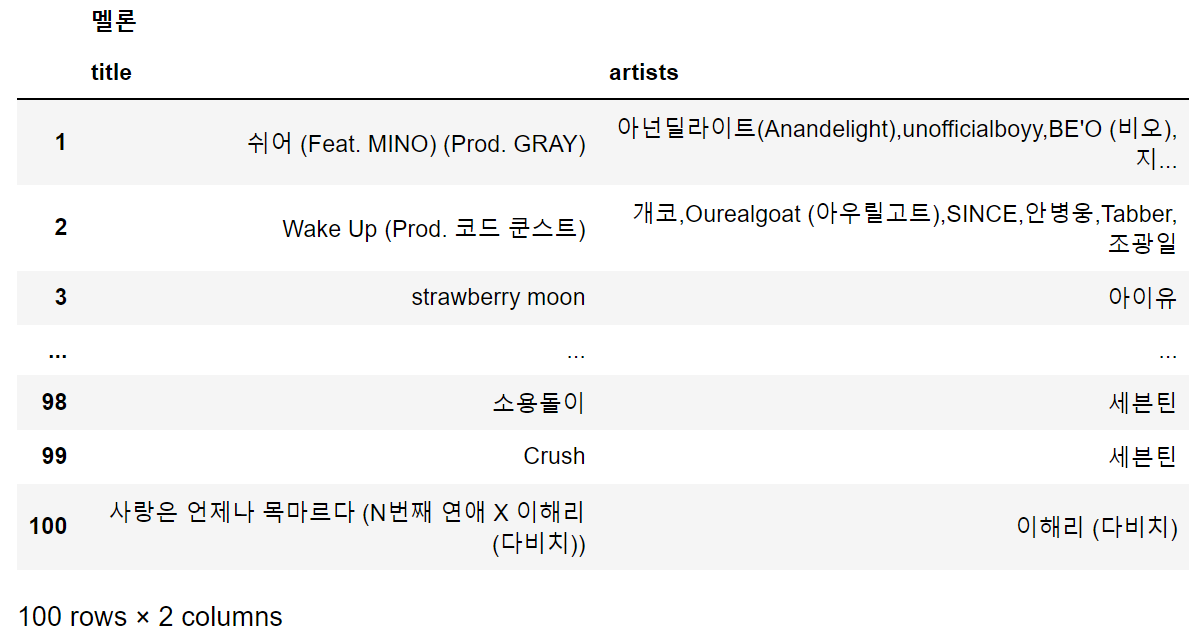

In [464]:
melon_url='https://www.melon.com/chart/index.htm'    #url 저장
header={
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'
}                                                    #멜론 헤더 저장
response = requests.get(melon_url,headers=header)    #response 저장
dom = BeautifulSoup(response.text,'html.parser')     #response를 html parsing
melon_chart_title = melon_chart[0].select('div.wrap_song_info > div.ellipsis.rank01 > span > a')  # 노래 이름 경로 저장
melon_chart_artist = melon_chart[0].select('div.wrap_song_info > div.ellipsis.rank02 > span')     # 가수 경로 저장

title_result=[                                 # 노래이름 dictionary 저장
    {
        'title' : title.text
    }
    for title in melon_chart_title
]
artist_result=[                                # 가수이름 dictionary 저장
    {
        'artists' : artist.text
    }
    for artist in melon_chart_artist
]
melon_df = pd.concat([pd.DataFrame(title_result),pd.DataFrame(artist_result)],axis=1)   # 두 개의 딕셔너리 합쳐서 한개의 데이터프레임으로 변경
melon_df.index += 1                       # 데이터 프레임의 인덱스에 모두 1을 더해 순위와 동일시
melon_df.columns.name = '멜론'            # 데이터 프레임의 columns 이름 부여
melon_df.index.name = '순위'              # 데이터 프레임의 index에 이름 '순위'부여
melon_df # ← 보여주기

멜론,title,artists
순위,,
1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
2,LOVE DIVE,IVE (아이브)
3,TOMBOY,(여자)아이들
4,우리들의 블루스,임영웅
5,사랑인가 봐,멜로망스
...,...,...
96,서랍,10CM
97,롤린 (Rollin'),브레이브걸스
98,감동이야 (feat. 성시경),싸이 (PSY)


# 3. 지니 차트 크롤링
- 실시간, 100개
- url : https://www.genie.co.kr/chart/top200
- 곡명, 아티스트명
- 결과는 아래 예시와 같이 DataFrame 에 담고 보여주기 → 변수명 **genie_df**
- 하나의 셀로 작성하세요

[예시]
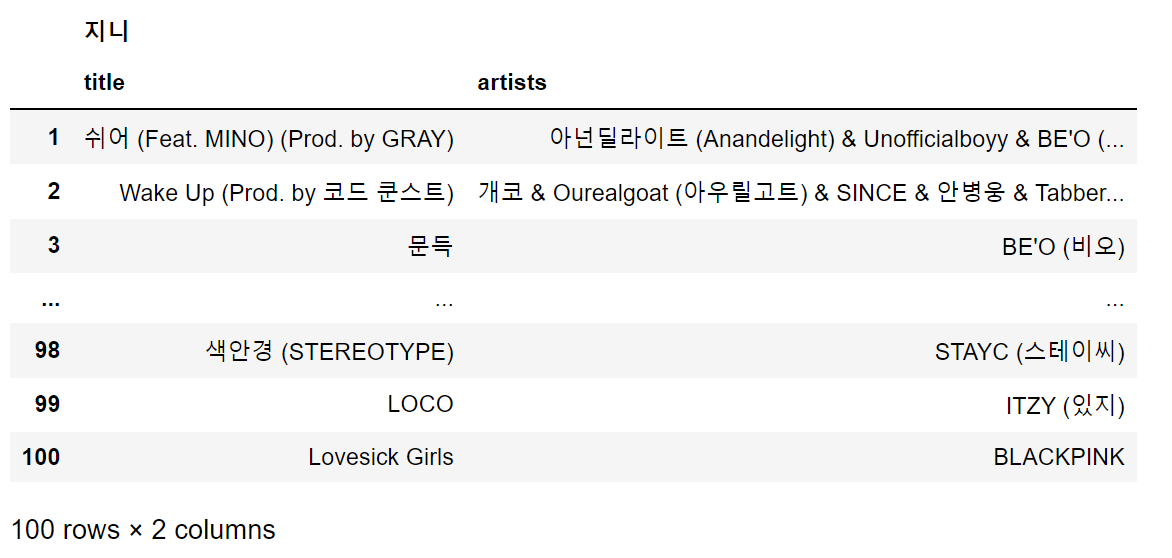

In [253]:
genie_url=f'https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220503&hh=13&rtm=Y&pg=1'
response = requests.get(genie_url,headers=header)
dom = BeautifulSoup(response.text,'html.parser')
genie_select = dom.select('tbody > tr > td.info')
result1=[
    {
        'title': item.select_one('a.title.ellipsis').text.strip(),
        'artists': item.select_one('a.artist.ellipsis').text.strip()
    }
    for item in genie_select
]
genie_url=f'https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220503&hh=13&rtm=Y&pg=2'
response = requests.get(genie_url,headers=header)
dom = BeautifulSoup(response.text,'html.parser')
genie_select = dom.select('tbody > tr > td.info')
result2=[
    {
        'title': item.select_one('a.title.ellipsis').text.strip(),
        'artists': item.select_one('a.artist.ellipsis').text.strip()
    }
    for item in genie_select
]
genie_df1 = pd.DataFrame(result1)
genie_df2 = pd.DataFrame(result2)
genie_df = pd.concat([genie_df1,genie_df2],ignore_index=True)
genie_df.index += 1
genie_df.columns.name = '지니'
genie_df.index.name = '순위'
genie_df

지니,title,artists
순위,,
1,That That (Prod. & Feat. SUGA of BTS),싸이 (Psy)
2,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
3,LOVE DIVE,IVE (아이브)
4,TOMBOY,(여자)아이들
5,사랑인가 봐,멜로망스 (MeloMance)
...,...,...
96,Real Love,오마이걸 (OH MY GIRL)
97,겨울잠,아이유 (IU)
98,19금\n \...,Justin Bieber


In [459]:
result=[]                          # 빈 리스트 생성
for i in range(1,3):                #페이징 되있는 데이터를 한 리스트에 저장하기위하여 반복문 사용
    genie_url=f'https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220503&hh=13&rtm=Y&pg={i}' # 지니 url 저장 , 페이징 되있어서 f스트링 사용
    response = requests.get(genie_url,headers=header)      # response 저장
    dom = BeautifulSoup(response.text,'html.parser')       # response를 html parsing 한 것 저장
    genie_select = dom.select('tbody > tr > td.info')      # 원하는 데이터 경로 인덱싱
    
    for item in genie_select:           #result에 원하는 데이터 dictionary로 저장
        result.append({                 #append 시켜서 반복할때마다 곡 1개씩 리스트에 딕셔너리로 저장
                'title': item.select_one('a.title.ellipsis').text.replace('19금','').strip(),
                'artists': item.select_one('a.artist.ellipsis').text.strip()
            })

genie_df = pd.DataFrame(result)    # dictionary 형태의 크롤링 데이터 데이터프레임화
genie_df.index += 1                # 데이터 프레임의 index에 모두 1을 더하여 순위와 동일시
genie_df.columns.name = '지니'     # 데이터 프레임의 columns에 이름 부여
genie_df.index.name = '순위'       # 데이터 프레임의 index에 이름 '순위'부여
genie_df

지니,title,artists
순위,,
1,That That (Prod. & Feat. SUGA of BTS),싸이 (Psy)
2,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
3,LOVE DIVE,IVE (아이브)
4,TOMBOY,(여자)아이들
5,사랑인가 봐,멜로망스 (MeloMance)
...,...,...
96,Real Love,오마이걸 (OH MY GIRL)
97,오래된 노래,Standing Egg (스탠딩 에그)
98,12 : 45 (Stripped),etham


# 4. 크롤링 결과를 파일로 저장하기

### 4_1  DataFrame 합치기
- 3개 음원사이트 TOP100 결과를 하나의 DataFrame 으로 합치기
- '곡명'만 저장
- 컬럼명은 '벅스', 멜론', '지니'
- 인덱스명은 '순위'
- 합쳐진 DataFrame 은 **result_df** 변수에 담고 결과 보여주세요
- 하나의 셀로 작성하세요    

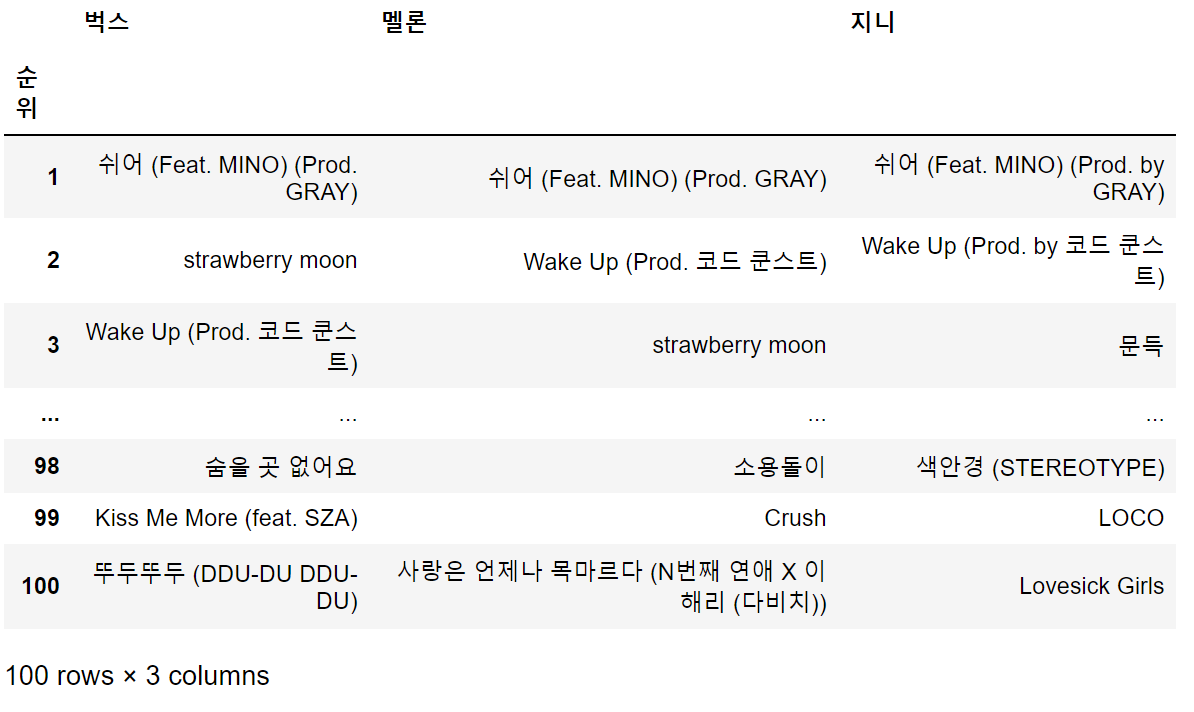

In [258]:
result_df = pd.concat([bugs_df['title'],melon_df['title'],genie_df['title']],axis=1) # 각 데이터 프레임의 'title'시리즈만 모아서 열단위로 합쳐서 데이터프레임화
result_df.columns = ['벅스','멜론','지니'] # 합친 데이터프레임의 columns 명 변경
result_df

,벅스,멜론,지니
순위,,,
1,That That (prod. & feat. SUGA of BTS),봄여름가을겨울 (Still Life),That That (Prod. & Feat. SUGA of BTS)
2,LOVE DIVE,LOVE DIVE,봄여름가을겨울 (Still Life)
3,FEARLESS,TOMBOY,LOVE DIVE
4,Celeb,우리들의 블루스,TOMBOY
5,Feel My Rhythm,사랑인가 봐,사랑인가 봐
...,...,...,...
96,우린 어떠한 별보다 빛날 거야,서랍,Real Love
97,흰눈,롤린 (Rollin'),겨울잠
98,너였다면,감동이야 (feat. 성시경),19금\n \...


### 4_2 엑셀 파일로 저장하기
- 위 DataFrame 을 엑셀파일로 저장 , 날짜시간을 사용한 파일명으로 저장
- 저장경로 : **dataset/data**
- 파일명형식 : **"음원순위yyyymmddHHMMss.xlsx"**
    - ex) 음원순위20210524131122.xlsx
- 하나의 셀로 작성하세요

[저장된 엑셀파일 예시]
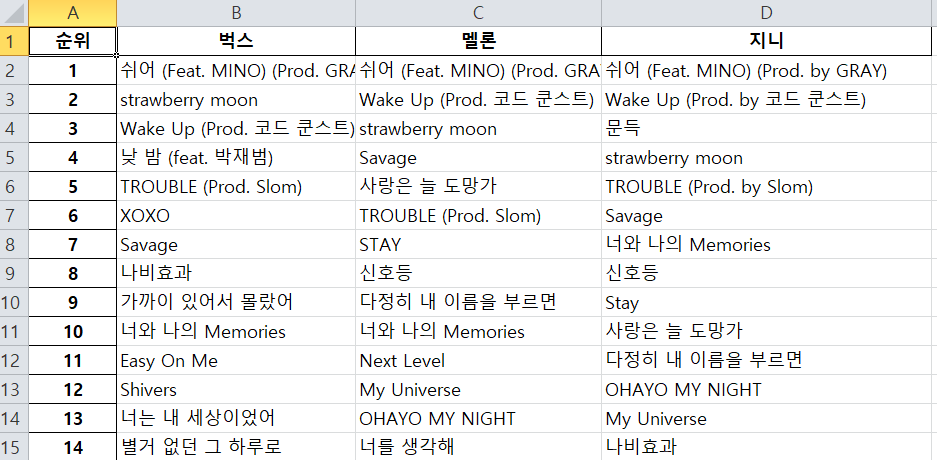

In [287]:
# 하나의 셀로 작성하세요
# 현재 날짜시간 사용하여 저장할 파일명 작성
now = time.strftime('%Y%m%d%H%M%S')    # 현재시간을 년,월,일,시,분,초로 형식으로 저장
filename = f'음원순위{now}.xlsx'       # 파일명을 현재시간이 포함된 엑셀로 저장

print(filename) # ← 보여주기
if not os.path.exists('C:\\DevRoot\\dataset\\data'): # 해당 주소에 명명한 폴더가 없으면 
    os.makedirs('C:\\DevRoot\\dataset\\data')        # 해당 주소에 폴더를 생성한다
filepath = os.path.join('C:',os.sep, 'DevRoot','dataset','data',filename) #주소와 파일명을 합쳐서 저장
result_df.to_excel(filepath, encoding='utf-8')  # result_df라는 데이터프레임을 excel로 저장

음원순위20220503142511.xlsx


### 4_3 저장한 엑셀 파일 읽어오기
- 위 저장한 엑셀파일을 다시 **result_df** 변수에 DataFrame 으로 읽어와서 결과 보여주세요
- '순위' 컬럼을 index 로 하여 읽어오기
- 하나의 셀로 작성하세요

In [290]:
result_df = None    # 일단 기존 데이터 삭제

result_df = pd.read_excel(filepath, index_col=0) # filepath 라는 경로에 엑셀을 불러와서 데이터프레임으로 읽는다.
                                                #index_col=0 이면 엑셀의 인덱스는 생략
result_df # 보여주세요

,벅스,멜론,지니
순위,,,
1,That That (prod. & feat. SUGA of BTS),봄여름가을겨울 (Still Life),That That (Prod. & Feat. SUGA of BTS)
2,LOVE DIVE,LOVE DIVE,봄여름가을겨울 (Still Life)
3,FEARLESS,TOMBOY,LOVE DIVE
4,Celeb,우리들의 블루스,TOMBOY
5,Feel My Rhythm,사랑인가 봐,사랑인가 봐
...,...,...,...
96,우린 어떠한 별보다 빛날 거야,서랍,Real Love
97,흰눈,롤린 (Rollin'),겨울잠
98,너였다면,감동이야 (feat. 성시경),19금\n \...


# 5. 크롤링 결과를 DB 에 저장하기

### 5_1 테이블 작성하기
1. 사용 DataBase 와 계정은 수업시간에 작성한 것으로 합니다.
1. 테이블 DDL 작성
    - 테이블명: **musicchart**

|컬럼명uid|타입|제약조건|설명|
|---|---|---|---|
|uid|정수|AI,PK||
|site|문자열||사이트명(**벅스**, **멜론**, **지니**  중 하나)|
|ranking|정수||순위|
|title|문자열||곡명|
|artist|문자열||가수,아티스트|
|crawlDate|DATETIME|||


1. 하나의 셀로 작성하세요
1. DDL 은 반드시 코드 안에서 작성해서 수행하세요

In [292]:
# DDL 작성하기
# 하나의 셀로 완성해주세요


conn = pymysql.connect(     # sql 로그인 위한 connet
        host='localhost',  #호스트명
        port=3306,          # 디폴트 3306
        user='myuser118',   # 계정아이디
        password='1234',    # 계정비번
        database='mydb118', # 접속할 database
        charset='utf8'      #인코딩 속성
)

try:            #바로 밑 문장 실행하고 pymysql.OperationalError오류 발생 시 except로               
    with conn.cursor() as cursor: 
        sql = '''
            CREATE TABLE musicchart (
                id INT(11) NOT NULL AUTO_INCREMENT PRIMARY KEY,
                site VARCHAR(10) NOT NULL,
                ranking INT(10) NOT NULL,
                title VARCHAR(300) NOT NULL ,
                artist VARCHAR(300) NOT NULL,
                crawilDate DATETIME,
            )
        '''
        cursor.execute(sql)  # DDL 쿼리 실행
        print('테이블 생성 성공')
except pymysql.OperationalError as e:
    print(e.args)
    print('mysql에러코드:', e.args[0])   # MySQL 에러코드
    print('mysql에러메세지:', e.args[1])   # MySQL 에러메세지
finally:         # 위의 문장 오류 여부에 상관없이 conn.close()를 실행한다.
    conn.close()




테이블 생성 성공


### 5_2 INSERT 하기
1. INSERT
    - 위에서 작성한 벅스, 멜론, 지니 DataFrame 객체 사용
    - INSERT 되는 순서는 무관
    
[INSERT 결과 예시]
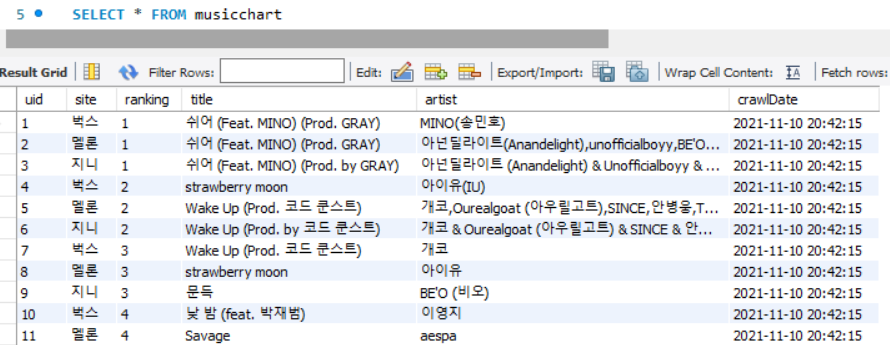

In [471]:
bugs_df['사이트']='벅스'  #각 3개의 df의 '사이트'라는 columns에 각 사이트명 할당
melon_df['사이트']='멜론'
genie_df['사이트']='지니'

C:\Users\user\AppData\Local\Temp\ipykernel_19352\2663863534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bugs_df['사이트']='벅스'  #각 3개의 df의 '사이트'라는 columns에 각 사이트명 할당


In [473]:
# DML : INSERT 수행
# 하나의 셀로 작성하세요

conn = pymysql.connect(     # Mysql에 connet 
        host='localhost',  #호스트명
        port=3306,          # 디폴트 3306
        user='myuser118',   # 계정아이디
        password='1234',    # 계정비번
        database='mydb118', # 접속할 database
        charset='utf8'      #인코딩 속성
)

try:
    crawlDate = time.strftime('%Y-%m-%d %H:%M:%S')  #crawlDate에 현재시간을 정해진 형식으로 저장
    
    
    with conn.cursor() as cursor:
        # prepared statement 방식   musicchart의 site, ranking, title, artist, crawilDate에 데이터 insert
        sql = "INSERT INTO musicchart(site, ranking, title, artist, crawilDate) VALUES (%s, %s, %s, %s, %s)"
    
        cnt = 0  # cnt 값 초기화
        #bugs_df에서 인덱스를 초기화 하고 행단위로 dictinary 화 시킨 값의 데이터를 위에서 선언한 sql에서 선언한 변수 순서대로 삽입 
        for sql_result in bugs_df.reset_index().to_dict('records'):   
            cnt += cursor.execute(sql, (sql_result['사이트'], sql_result['순위'],sql_result['title'],sql_result['artists'] ,crawlDate) )  
        #melon_df에서 인덱스를 초기화 하고 행단위로 dictinary 화 시킨 값의 데이터를 위에서 선언한 sql에서 선언한 변수 순서대로 삽입 
        for sql_result in melon_df.reset_index().to_dict('records'):
            cnt += cursor.execute(sql, (sql_result['사이트'], sql_result['순위'],sql_result['title'],sql_result['artists'] ,crawlDate) )  
        #genie_df에서 인덱스를 초기화 하고 행단위로 dictinary 화 시킨 값의 데이터를 위에서 선언한 sql에서 선언한 변수 순서대로 삽입 
        for sql_result in genie_df.reset_index().to_dict('records'):
            cnt += cursor.execute(sql, (sql_result['사이트'], sql_result['순위'],sql_result['title'],sql_result['artists'] ,crawlDate) )  
        print(cnt, '개 row insert 성공') #몇 개의 row 가 insert 되었는지 출력
                                        #cursor.executed 의 리턴 값은 행의 수  즉,반복하는단계에서는 1이기 떄문에 이를
                                        #cnt에 반복하여 += 하는 것으로 몇 개의 행이 insert 되었는지 알 수 있다.
        
    conn.commit()  # DML 수행완료후에는 commit() 하기 
                   # commit()을 해야 DB에 데이터가 반영이 된다.
    
    # cursor 객체에는 쿼리실행결과에 대한 정보들을 담고 있다.
    print(cursor.lastrowid, cursor.rowcount, cursor.rownumber)   #cursor의 마지막 rowid, cursor의 row 개수, cursor의 번호(인덱스) 출력
    
# pymysql 을 다룰때 자주 등장하는 Error 들    
except (pymysql.OperationalError, pymysql.ProgrammingError, 
       pymysql.InternalError, pymysql.IntegrityError) as e:
    print(e.args)
    print('mysql에러코드:', e.args[0])   # MySQL 에러코드
    print('mysql에러메세지:', e.args[1])   # MySQL 에러메세지
finally:
    conn.close()      #마지막에는 반드시 conn close 해주기
    



1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
200 개 row insert 성공
900 1 0


### 5_3 SELECT 하여 읽어오기
- 가장 상위 Top100 읽어오기
    - 가장 **최근 크롤링 일시** 읽어와서 출력하기 (SELECT)
    - 해당일시 Top100 데이터를 DataFrame 으로 읽어와서 아래예시와 같이 만들어 **df_result** 변수에 담아 보여주기

[예시]
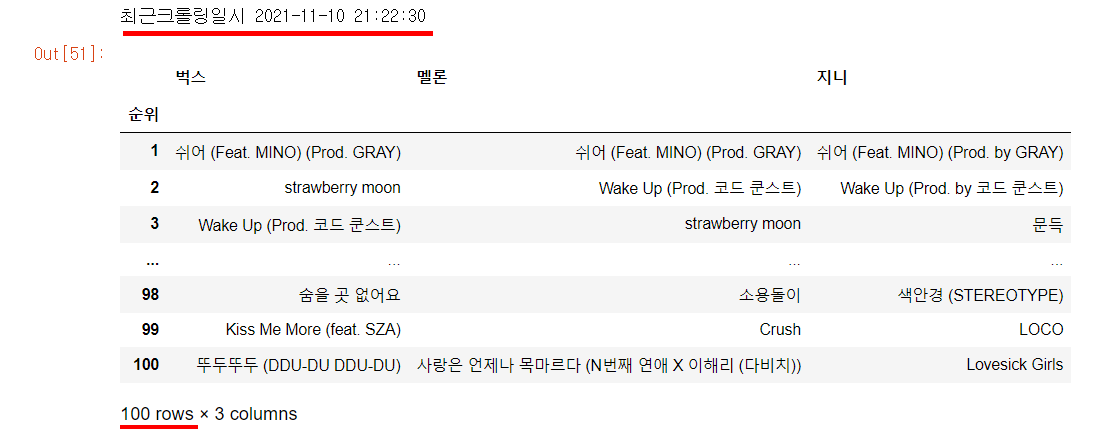    

In [475]:
# SELECT 수행
# 하나의 셀로 작성하세요
df_result = None
conn = pymysql.connect(
        host='localhost',
        port=3306,       # 디폴트 3306
        user='myuser118',   # 계정아이디
        password='1234',    # 계정비번
        database='mydb118', # 접속할 database
        charset='utf8'
)
try:
    with conn.cursor() as cursor:
        sql= """
            SELECT * FROM musicchart
        """
        cursor.execute(sql)
        df_db = pd.read_sql(sql,conn)
except (pymysql.OperationalError, pymysql.ProgrammingError, 
       pymysql.InternalError, pymysql.IntegrityError) as e:
    print(e.args)
    print('mysql에러코드:', e.args[0])   # MySQL 에러코드
    print('mysql에러메세지:', e.args[1])   # MySQL 에러메세지
finally:
    conn.close()  
    
df_db.set_index(keys=['ranking'],drop=True).groupby('ranking')
pd.DataFrame(df_db.set_index(keys=['site'])[['title','ranking']])
title_site = pd.DataFrame(df_db.set_index(keys=['ranking'])[['title','site']])
bugs_df_db = title_site[title_site['site'] == '벅스'][['title']]
melon_df_db = title_site[title_site['site'] == '멜론'][['title']]
genie_df_db = title_site[title_site['site'] == '지니'][['title']]

result_df = pd.concat([bugs_df_db,melon_df_db,genie_df_db],axis=1)
result_df.columns=['벅스','멜론','지니']
result_df

C:\ProgramData\Anaconda3\envs\data118\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,벅스,멜론,지니
ranking,,,
1,LOVE DIVE,봄여름가을겨울 (Still Life),That That (Prod. & Feat. SUGA of BTS)
2,That That (prod. & feat. SUGA of BTS),LOVE DIVE,봄여름가을겨울 (Still Life)
3,TOMBOY,TOMBOY,LOVE DIVE
4,감동이야 (feat. 성시경),우리들의 블루스,TOMBOY
5,Celeb,사랑인가 봐,사랑인가 봐
...,...,...,...
96,나는 트로트가 싫어요,서랍,Real Love
97,서랍,롤린 (Rollin'),오래된 노래
98,바라만 본다,감동이야 (feat. 성시경),12 : 45 (Stripped)


In [539]:
# SELECT 수행
# 하나의 셀로 작성하세요
df_result = None
conn = pymysql.connect(
        host='localhost',
        port=3306,       # 디폴트 3306
        user='myuser118',   # 계정아이디
        password='1234',    # 계정비번
        database='mydb118', # 접속할 database
        charset='utf8'
)
try:
    with conn.cursor() as cursor: # musicchart 테이블 중 crawilDate 라는 변수 중 가장 큰 값(가장 최근) 만 고르기
        sql= """
            SELECT * FROM musicchart where crawilDate =(SELECT max(crawilDate) FROM musicchart)
        """
        cursor.execute(sql)
        df_db = pd.read_sql(sql,conn) # df_db에 mysql에서 불러온 값을 데이터를 df_db에 저장
except (pymysql.OperationalError, pymysql.ProgrammingError, 
       pymysql.InternalError, pymysql.IntegrityError) as e:
    print(e.args)
    print('mysql에러코드:', e.args[0])   # MySQL 에러코드
    print('mysql에러메세지:', e.args[1])   # MySQL 에러메세지
finally:
    conn.close()  

print('최근크롤링 일시:', str(df_db['crawilDate'].values[0]).replace('T',' ')[:22]) # mysql에서 가져온 가장 최근의 크롤링 날짜 출력
title_site = pd.DataFrame(df_db.set_index(keys=['ranking'])[['title','site']]) 
bugs_df_db = title_site[title_site['site'] == '벅스'][['title']] #z크롤링한 데이터를 각 사이트 명으로 마스킹 해서 각각 저장
melon_df_db = title_site[title_site['site'] == '멜론'][['title']]
genie_df_db = title_site[title_site['site'] == '지니'][['title']]

result_df = pd.concat([bugs_df_db,melon_df_db,genie_df_db],axis=1) # 마스크를 씌운 3개의 df를 행방향(열단위) 로 합침
result_df.columns=['벅스','멜론','지니']                           #합친 데이터프레임에 column명 변경
result_df

최근크롤링 일시: 2022-05-03 18:52:56.00


C:\ProgramData\Anaconda3\envs\data118\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,벅스,멜론,지니
ranking,,,
1,That That (prod. & feat. SUGA of BTS),봄여름가을겨울 (Still Life),That That (Prod. & Feat. SUGA of BTS)
2,LOVE DIVE,LOVE DIVE,봄여름가을겨울 (Still Life)
3,감동이야 (feat. 성시경),TOMBOY,LOVE DIVE
4,TOMBOY,우리들의 블루스,TOMBOY
5,Celeb,사랑인가 봐,사랑인가 봐
...,...,...,...
96,나는 트로트가 싫어요,서랍,Real Love
97,서랍,롤린 (Rollin'),오래된 노래
98,바라만 본다,감동이야 (feat. 성시경),12 : 45 (Stripped)
